In [33]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
discard = {"Ames Dwarf Mice", "Snell Dwarf Mice"}
data = (
    pd.read_csv("deming.csv")
    .rename(
        columns={
            "Median lifespan increase (treated/control)": "Increment",
            "Year Published": "Year",
        }
    )
    .assign(Increment=lambda x: pd.to_numeric(x.Increment.str.replace("%", "")) / 100)[
        ["Intervention", "Year", "Increment"]
    ]
    .sort_values("Increment", ascending=False)
    .query("Intervention not in @discard")
)

In [43]:
data

,Intervention,Year,Increment
51,GHRH KO,2013,1.46
31,FGF-21,2012,1.39
27,GHR-BP,2000,1.38
0,Senescent cell removal,2016,1.35
33,AC5 KO,2007,1.32
60,CR diet with lard,2015,1.32
20,Insulin receptor substrate null,2008,1.32
59,PAPP,2010,1.31
9,p66,1999,1.28
81,Bi-maternal mice,2010,1.28


In [41]:
dadata.drop_duplicates().unique()

array([1.18, 1.28, 1.38, 1.39, 1.46])

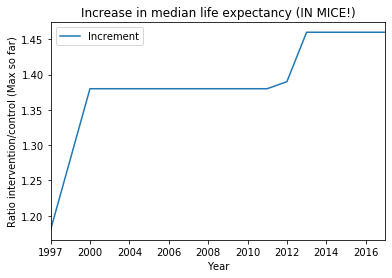

In [62]:
to_plot = data.groupby(["Year"]).Increment.max().expanding().max()
to_plot.reset_index().assign(Year=lambda x: x.Year.astype(str)).set_index("Year").plot(
    title="Increase in median life expectancy (IN MICE!)"
)
plt.ylabel("Ratio intervention/control (Max so far)")
plt.savefig("download.png")

In [61]:
to_plot
data.query('Increment in @breakpoints').sort_values(['Increment','Year'])

,Intervention,Year,Increment
73,uPA (in ocular lens/CNS nerve cells),1997,1.18
8,S6K1,2009,1.18
42,Litter enlargemnet (CR),2009,1.18
49,Per2 (-/-),2016,1.18
9,p66,1999,1.28
38,Hcrt-UCP2,2006,1.28
81,Bi-maternal mice,2010,1.28
87,clk-1(-/-) with clk-1 transgene,2014,1.28
10,Lowering protein:carbohydrate ratio,2014,1.28
27,GHR-BP,2000,1.38
